<a href="https://colab.research.google.com/github/anushacodes/ml-implementations/blob/main/neuralnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import random

Initialize weights and biases


In [ ]:
class NeuralNetwork():


  def __init__(self, input_size, hidden_size, output_size, activation = "relu"):

        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size = hidden_size

        self.weights1 = np.random.randn(input_size, hidden_size)
        self.bias1 = np.random.randn(1, hidden_size)

        self.weights2 = np.random.randn(hidden_size, output_size)
        self.bias2 = np.random.randn(1, output_size)


        if activation == "sigmoid":
            self.activation = self.sigmoid
            self.activation_deriv = self.sigmoid_deriv
        elif activation == "tanh":
            self.activation = self.tanh
            self.activation_deriv = self.tanh_deriv
        elif activation == "relu":
            self.activation = self.relu
            self.activation_deriv = self.relu_deriv
        else:
            raise ValueError("Invalid. Choose 'sigmoid', 'tanh', or 'relu'.")


  @staticmethod
  def sigmoid(x):
      return 1 / (1 + np.exp(-x))

  @staticmethod
  def sigmoid_deriv(x):
      return x * (1 - x)

  @staticmethod
  def tanh(x):
      return np.tanh(x)

  @staticmethod
  def tanh_deriv(x):
      return 1 - np.tanh(x) ** 2

  @staticmethod
  def relu(x):
      return np.maximum(0, x)

  @staticmethod
  def relu_deriv(x):
      return np.where(x > 0, 1, 0)

  @staticmethod
  def mse(y, y_pred):
      return np.mean(np.square(y - y_pred))




  def forward(self, x):

          self.z1 = np.dot(x, self.weights1) + self.bias1
          self.a1 = self.activation(self.z1)

          self.z2 = np.dot(self.a1, self.weights2) + self.bias2
          self.a2 = self.activation(self.z2)

          return self.a2


  def backward(self, x, y, output, learning_rate):

        error1 = y - self.a2
        delta1 = error1 * self.activation_deriv(self.a2)

        self.weights2 += np.dot(self.a1.T, delta1) * learning_rate
        self.bias2 += np.sum(delta1, axis=0, keepdims=True) * learning_rate

        error2 = np.dot(delta1, self.weights2.T)
        delta2 = error2 * self.activation_deriv(self.a1)

        self.weights1 += np.dot(x.T, delta2) * learning_rate
        self.bias1 += np.sum(delta2, axis=0, keepdims=True) * learning_rate


  def train(self, x, y, epochs, learning_rate):
          for i in range(epochs):
              output = self.forward(x)
              self.backward(x, y, output, learning_rate)

              if (i + 1) % 1000 == 0:
                  loss = self.mse(y, output)
                  print(f"Epoch {i+1}/{epochs} - Loss: {loss}")

In [29]:
x = np.array([[0, 0, 1],
              [1, 1, 1],
              [1, 0, 1],
              [0, 1, 1]])

y = np.array([[0], [1], [1], [0]])

In [30]:
nn = NeuralNetwork(3, 4, 1, activation="sigmoid")
nn.train(x, y, 10000, 0.1)

Epoch 10000/10000 - Loss: 0.00026726842676095077


In [31]:
yp = nn.forward(x)

print(yp)

[[0.01911877]
 [0.98318728]
 [0.98534313]
 [0.01435022]]


In [32]:
import matplotlib.pyplot as plt

x_sin = np.linspace(-2 * np.pi, 2 * np.pi, 100).reshape(-1, 1)
y = np.sin(x_sin) + 0.1 * np.random.randn(*x_sin.shape)  # sine function with noise


In [33]:
nn_tanh = NeuralNetwork(1, 10, 1, activation="tanh")
nn_tanh.train(x_sin, y, 100000, 0.001)

Epoch 10000/100000 - Loss: 0.05135755308101775
Epoch 20000/100000 - Loss: 0.04987065626072877
Epoch 30000/100000 - Loss: 0.054899363569668964
Epoch 40000/100000 - Loss: 0.059150851193358146
Epoch 50000/100000 - Loss: 0.06197285267389841
Epoch 60000/100000 - Loss: 0.03970294378781122
Epoch 70000/100000 - Loss: 0.03597607327237992
Epoch 80000/100000 - Loss: 0.03606542184361232
Epoch 90000/100000 - Loss: 0.03733030616018818
Epoch 100000/100000 - Loss: 0.03819233723514179


In [34]:
y_pred_tanh = nn_tanh.forward(x_sin)

<ipython-input-39-7b5d7193e083>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


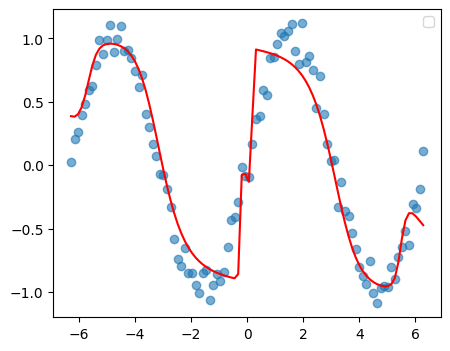

In [39]:
plt.figure(figsize=(5, 4))
plt.scatter(x_sin, y, alpha=0.6)
plt.plot(x_sin, y_pred_tanh, color="red")
plt.legend()
plt.show()